In [15]:
# source: https://sage.math.iastate.edu/home/pub/74/

def zero_forcing_original(G,prop_time = False):
    """
    INPUT:   G a directed/oriented graph with vertices labeled 0,...,(n-1)
    OUTPUT:  a minimal zero forcing set
    If prop_time = True then also finds set with min prop time
    """
    n = G.order()
    nbrs = []  # Find lists of out neighbors (for push_zeros)
    for v in range(n):
        out_nbrs = []
        for e in G.outgoing_edges(v):
            if e[0]==v:
                out_nbrs.append(e[1])
            else:
                out_nbrs.append(e[0])
        nbrs.append(out_nbrs)
    found_Z = False  # a flag used for knowing when to stop outer loop
    best = (0,n)  # used for prop time
    for t in range(1,n+1):  # here t represents size of zero forcing sets
        for S in Combinations(range(n),t):
            Q = push_zeros_original(nbrs,S,n)  # what can be achieved coloring S blue
            if len(Q[0]) == n:  # all blue?
                if not prop_time:
                    return S  # if not tracking prop time, return zero forcing set
                found_Z = True  # flag to stop outer loop after the current size
                if Q[1] < best[1]:  # test to see if a better prop time is found
                    best = (S,Q[1])  
        if found_Z:
            return best  # return prop time

def push_zeros_original(nbrs,S,n):
    """
    INPUT:   nbrs = a list of all out-neighbors of each vertex
             S = an initial set of "blue" vertices
    OUTPUT:  the set of all vertices forced under repeated
             iteration of the color change rule
    """
    active = set(S)  # blue vertices that might be able to force
    filled = set(S)  # blue vertices
    unfilled = set(range(n)).difference(filled)  # white vertices
    force = True
    count = -1  # count keeps track of zero forcing rounds
    while force:  # keep going until no more forces happen
        count += 1  # increase count
        force = False
        new_active = copy(active)  # copy to be careful with prop time
        for v in active:  # check each blue vertex which might force
            white_nbrs = set(nbrs[v]).intersection(unfilled)  # find white neighbors
            if len(white_nbrs) == 0:  # if no white neighbors, will never force
                new_active.remove(v)  # remove from active
            elif len(white_nbrs) == 1:  #one white neighbor so can force
                force = True
                w = white_nbrs.pop()  # the white neighbor that we force
                filled.add(w)  # w is now blue
                unfilled.remove(w)  # so it's not white
                new_active.add(w)  # w might now be able to force
                new_active.remove(v)  # but v will never force again
        active = copy(new_active)  # update what can be forcing
    return filled, count  # return what was changed blue, and how many rounds 

In [19]:
def zero_forcing_edited(G,prop_time = False):
    n = G.order()
    nbrs = []  # Find lists of out neighbors (for push_zeros)
    for v in range(n):
        out_nbrs = []
        for e in G.outgoing_edges(v):
            if e[0]==v:
                out_nbrs.append(e[1])
            else:
                out_nbrs.append(e[0])
        nbrs.append(out_nbrs)
    found_Z = False  # a flag used for knowing when to stop outer loop
    best = (0,n)  # used for prop time
    for t in range(1,n+1):  # here t represents size of zero forcing sets
        for S in Combinations(range(n),t):
            Q = push_zeros_edited(nbrs,S,n)  # what can be achieved coloring S blue
            if len(Q[0]) == n:  # all blue?
                if not prop_time:
                    return S  # if not tracking prop time, return zero forcing set
                found_Z = True  # flag to stop outer loop after the current size
                if Q[1] < best[1]:  # test to see if a better prop time is found
                    best = (S,Q[1])  
        if found_Z:
            return best  # return prop time
        
def push_zeros_edited(nbrs, B, n):
    active = set(B)
    filled = set(B)
    unfilled = set(range(n)).difference(filled)
    force = True
    prop_time = -1
    
    while force:  # keep going until no more forces happen
        prop_time += 1
        force = False
        
        # copy to be careful with prop time
        new_active = active.copy()
        new_filled = filled.copy()
        new_unfilled = unfilled.copy()
        
        for v in active:  # check each blue vertex which might force
            white_nbrs = set(nbrs[v]).intersection(unfilled)
            if len(white_nbrs) == 0:  # if no white neighbors, remove from active
                new_active.remove(v)
            elif len(white_nbrs) == 1:  # one white neighbor so can force
                w = white_nbrs.pop()
                new_filled.add(w)  # w is now blue
                if w in new_unfilled: # no other vertex in this time step has forced w yet
                    force = True 
                    new_unfilled.remove(w)
                new_active.add(w)
                new_active.remove(v)
        active = new_active.copy()
        filled = new_filled.copy()
        unfilled = new_unfilled.copy()
        
    return filled, prop_time

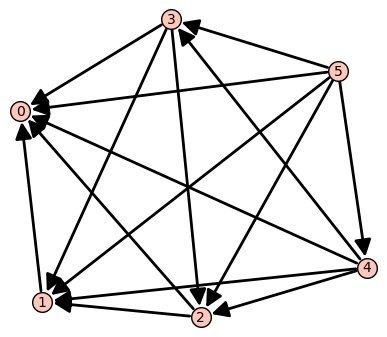

In [17]:
# Tournament on 6 vertices with max throttling num
M = matrix([[0,0,0,0,0,0],
            [1,0,0,0,0,0],
            [1,1,0,0,0,0],
            [1,1,1,0,0,0],
            [1,1,1,1,0,0],
            [1,1,1,1,1,0]])
G2 = DiGraph(M)
G2.show() 

In [18]:
zero_forcing_original(G2, prop_time=True)

([1, 3, 5], 1)

In [20]:
zero_forcing_edited(G2, prop_time=True)

([1, 3, 5], 3)